In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#http://techbus.safaribooksonline.com/video/databases-and-reporting-tools/9781771375764/introduction/video240029

# Date Types

In [104]:
temps = pd.Series([10, 30, 40, 50, 90])

In [105]:
temps

0    10
1    30
2    40
3    50
4    90
dtype: int64

In [106]:
temps = pd.Series([1.1, 30, 40, 50, 90])

In [107]:
temps

0     1.1
1    30.0
2    40.0
3    50.0
4    90.0
dtype: float64

In [108]:
temps = pd.Series([{}, 30.1, 40, 50, 90])

In [109]:
temps

0      {}
1    30.1
2      40
3      50
4      90
dtype: object

In [110]:
temps = pd.Series(["2016-01-02", "2017-03-04"])

In [111]:
temps

0    2016-01-02
1    2017-03-04
dtype: object

In [112]:
pd.to_datetime(temps)

0   2016-01-02
1   2017-03-04
dtype: datetime64[ns]

# More Series

In [113]:
temps = pd.Series([10, 30, 40, 50, 90])
for x in temps:
    print x

10
30
40
50
90


In [114]:
10 in temps

False

In [115]:
4 in temps  #check the index

True

In [116]:
40 in set(temps)

True

In [117]:
40 in temps.values

True

In [118]:
set(temps)

{10, 30, 40, 50, 90}

In [119]:
dict(temps)

{0: 10, 1: 30, 2: 40, 3: 50, 4: 90}

In [120]:
for i, val in temps.iteritems():
    print i, val

0 10
1 30
2 40
3 50
4 90


In [121]:
for i, val in dict(temps).items():
    print i,val

0 10
1 30
2 40
3 50
4 90


# Broadcasting

In [122]:
temps

0    10
1    30
2    40
3    50
4    90
dtype: int64

In [123]:
temps + 2

0    12
1    32
2    42
3    52
4    92
dtype: int64

In [124]:
temps * 2

0     20
1     60
2     80
3    100
4    180
dtype: int64

In [125]:
t2 = pd.Series([11,22,33], index = [1,2,3])

In [126]:
temps + t2

0     NaN
1    41.0
2    62.0
3    83.0
4     NaN
dtype: float64

In [127]:
temps * t2

0       NaN
1     330.0
2     880.0
3    1650.0
4       NaN
dtype: float64

In [128]:
def add_2(val):
    return val+2

temps.apply(add_2)

0    12
1    32
2    42
3    52
4    92
dtype: int64

In [129]:
temps.apply(float)

0    10.0
1    30.0
2    40.0
3    50.0
4    90.0
dtype: float64

In [130]:
temps.astype(str)

0    10
1    30
2    40
3    50
4    90
dtype: object

In [131]:
temps.astype(float)

0    10.0
1    30.0
2    40.0
3    50.0
4    90.0
dtype: float64

# CRUD Operations Reading

In [132]:
temps = pd.Series([10, 30, 40, 50, 90], index = list("ABCDE"))
temps

A    10
B    30
C    40
D    50
E    90
dtype: int64

In [133]:
temps.loc["A"] #based on label

10

In [134]:
temps[0] #based on position and label

10

In [135]:
temps["A"]

10

In [136]:
temps.B

30

In [137]:
temps.iloc[-1] #based on position

90

In [138]:
temps = pd.Series([10, 30, 40, 50, 90], index = ["A","B","C",0,1]) # mixed index
temps

A    10
B    30
C    40
0    50
1    90
dtype: int64

In [139]:
temps[4]

90

In [140]:
temps.loc[0] #label

50

In [141]:
temps[0] #label

50

# CRUD updating

In [142]:
temps = pd.Series([10, 30, 40, 50, 90], index = list("ABCDE"))
temps

A    10
B    30
C    40
D    50
E    90
dtype: int64

In [143]:
temps["A"] = 11
temps.loc["B"] = 31
temps.iloc[-1] = 91
temps

A    11
B    31
C    40
D    50
E    91
dtype: int64

In [144]:
t2 = temps.append(pd.Series([100],index=["F"]))
t2

A     11
B     31
C     40
D     50
E     91
F    100
dtype: int64

In [145]:
temps

A    11
B    31
C    40
D    50
E    91
dtype: int64

In [146]:
temps.set_value("D",51)

A    11
B    31
C    40
D    51
E    91
dtype: int64

In [147]:
temps

A    11
B    31
C    40
D    51
E    91
dtype: int64

# Delete

In [148]:
temps

A    11
B    31
C    40
D    51
E    91
dtype: int64

In [149]:
del temps["A"]

In [150]:
temps

B    31
C    40
D    51
E    91
dtype: int64

In [151]:
temps[temps< 50]

B    31
C    40
dtype: int64

In [152]:
mask = temps.index == "D"

In [153]:
mask

array([False, False,  True, False], dtype=bool)

In [154]:
temps[mask]

D    51
dtype: int64

# Summary Statistics

In [155]:
temps.min()

31

In [156]:
temps.describe()

count     4.000000
mean     53.250000
std      26.462237
min      31.000000
25%      37.750000
50%      45.500000
75%      61.000000
max      91.000000
dtype: float64

In [157]:
temps.describe(percentiles=[.05, .1, .3])

count     4.000000
mean     53.250000
std      26.462237
min      31.000000
5%       32.350000
10%      33.700000
30%      39.100000
50%      45.500000
max      91.000000
dtype: float64

In [158]:
ser8 = pd.Series(["price", "accord", "price", "camry"], dtype='category')
ser8

0     price
1    accord
2     price
3     camry
dtype: category
Categories (3, object): [accord, camry, price]

In [159]:
ser8.describe()

count         4
unique        3
top       price
freq          2
dtype: object

In [160]:
ser8.value_counts()

price     2
camry     1
accord    1
dtype: int64

# Duplicate

In [161]:
dp = pd.Series([10,30,50,30,100],index=list("ABCBE"))

In [162]:
dp

A     10
B     30
C     50
B     30
E    100
dtype: int64

In [163]:
dp.duplicated()

A    False
B    False
C    False
B     True
E    False
dtype: bool

In [164]:
dp.duplicated(keep="last")

A    False
B     True
C    False
B    False
E    False
dtype: bool

In [165]:
dp.duplicated(keep="last").any()

True

In [166]:
dp.duplicated(keep="last").all()

False

In [167]:
dp["B"]

B    30
B    30
dtype: int64

In [168]:
dp.drop_duplicates()

A     10
B     30
C     50
E    100
dtype: int64

# Nan

In [169]:
pd.Series([None])

0    None
dtype: object

In [170]:
pd.Series([np.nan])

0   NaN
dtype: float64

In [171]:
temps

B    31
C    40
D    51
E    91
dtype: int64

In [172]:
t7 =temps.append(pd.Series([110, None, 120], index=list("FGH")))

In [173]:
t7

B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
G      NaN
H    120.0
dtype: float64

In [174]:
t7.isnull()

B    False
C    False
D    False
E    False
F    False
G     True
H    False
dtype: bool

In [175]:
t7.notnull()

B     True
C     True
D     True
E     True
F     True
G    False
H     True
dtype: bool

In [176]:
t7[t7.notnull()]

B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
H    120.0
dtype: float64

In [177]:
t7.fillna(11111)

B       31.0
C       40.0
D       51.0
E       91.0
F      110.0
G    11111.0
H      120.0
dtype: float64

In [178]:
t7.fillna(method='backfill')

B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
G    120.0
H    120.0
dtype: float64

# Plotting

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt

In [180]:
t7 = t7.fillna(0)

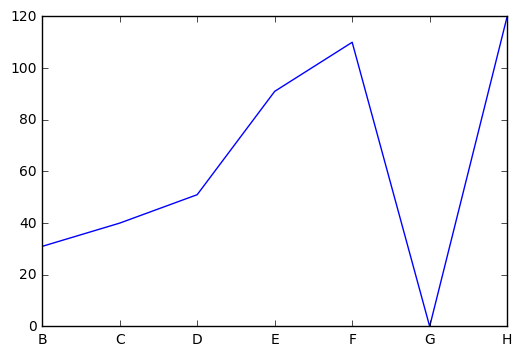

In [181]:
t7.plot()

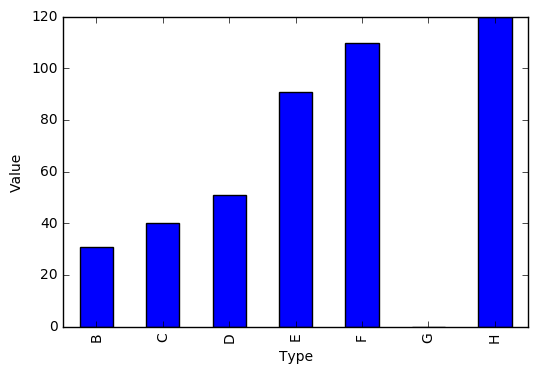

In [182]:
b = t7.plot.bar()
b.set_xlabel("Type")
b.set_ylabel("Value")

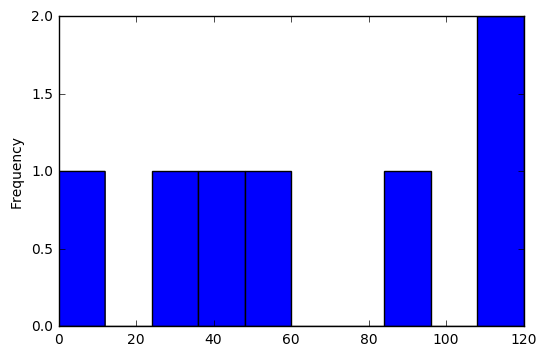

In [183]:
t7.plot.hist()

# Serialization

In [184]:
t7

B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
G      0.0
H    120.0
dtype: float64

In [185]:
t7.to_csv("t7.csv")

In [186]:
!cat t7.csv

B,31.0
C,40.0
D,51.0
E,91.0
F,110.0
G,0.0
H,120.0


In [187]:
t7.name = "T7"
t7.to_csv("t7.csv",header=True,index_label="Index")

In [188]:
!cat t7.csv

Index,T7
B,31.0
C,40.0
D,51.0
E,91.0
F,110.0
G,0.0
H,120.0


In [189]:
pd.Series.from_csv("t7.csv",header=0)

Index
B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
G      0.0
H    120.0
Name: T7, dtype: float64

In [190]:
pd.read_csv("t7.csv")

,Index,T7
0,B,31.0
1,C,40.0
2,D,51.0
3,E,91.0
4,F,110.0
5,G,0.0
6,H,120.0


In [191]:
tt = pd.read_csv("t7.csv",index_col=0,header=0)
tt

,T7
Index,
B,31.0
C,40.0
D,51.0
E,91.0
F,110.0
G,0.0
H,120.0


In [192]:
tt["T7"]

Index
B     31.0
C     40.0
D     51.0
E     91.0
F    110.0
G      0.0
H    120.0
Name: T7, dtype: float64